# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url)
        city_weather =  city_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chaihe
Processing Record 2 of Set 1 | ghat
Processing Record 3 of Set 1 | mumford
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | porto novo
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | ust'-ilimsk
Processing Record 8 of Set 1 | bowie
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | chateau-renault
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | nar'yan-mar
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | juneau
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | ugoofaaru
Processing Record 21 of Set 1 | ancud
Processing Record 22 of Set 1 | petropavlovsk-kamchatsky
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chaihe,44.7667,129.7000,-25.72,99,35,0.45,CN,1707074150
1,ghat,24.9647,10.1728,13.04,24,0,3.12,LY,1707073553
2,mumford,5.2618,-0.7590,26.97,80,63,4.61,GH,1707074150
3,ribeira grande,38.5167,-28.7000,17.65,94,75,9.39,PT,1707074150
4,porto novo,6.4965,2.6036,26.10,73,99,2.89,BJ,1707074150


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chaihe,44.7667,129.7000,-25.72,99,35,0.45,CN,1707074150
1,ghat,24.9647,10.1728,13.04,24,0,3.12,LY,1707073553
2,mumford,5.2618,-0.7590,26.97,80,63,4.61,GH,1707074150
3,ribeira grande,38.5167,-28.7000,17.65,94,75,9.39,PT,1707074150
4,porto novo,6.4965,2.6036,26.10,73,99,2.89,BJ,1707074150


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

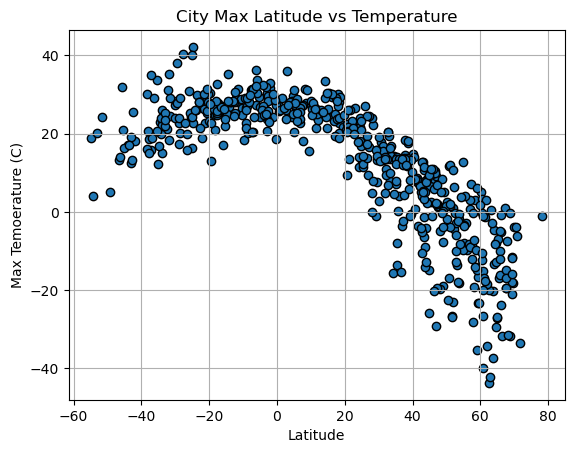

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temoerature (C)")
plt.title("City Max Latitude vs Temperature")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

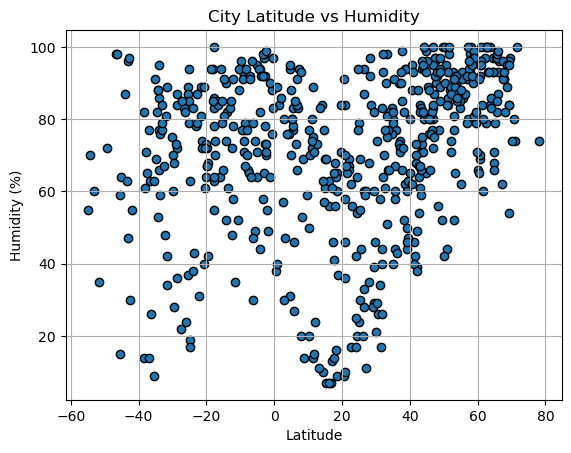

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

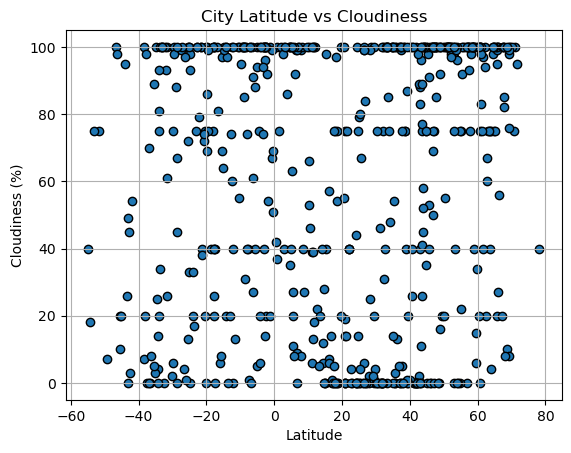

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

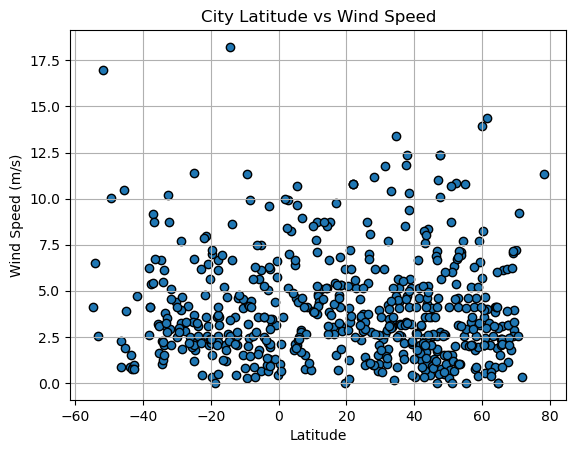

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
   regress_values = x * slope + intercept
   line_eq = f"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   correlation = st.pearsonr(x, y)
   plt.plot(x, regress_values, "r-")
   plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
   plt.scatter(x, y)
   plt.xlabel(f"{x.name}")
   plt.ylabel(f"{y.name}")
   print(f"The r-value is: {correlation[0]}")

In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chaihe,44.7667,129.7000,-25.72,99,35,0.45,CN,1707074150
1,ghat,24.9647,10.1728,13.04,24,0,3.12,LY,1707073553
2,mumford,5.2618,-0.7590,26.97,80,63,4.61,GH,1707074150
3,ribeira grande,38.5167,-28.7000,17.65,94,75,9.39,PT,1707074150
4,porto novo,6.4965,2.6036,26.10,73,99,2.89,BJ,1707074150


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,grytviken,-54.2811,-36.5092,4.04,70,18,6.50,GS,1707074151
9,adamstown,-25.0660,-130.1015,24.91,79,100,3.69,PN,1707074151
10,margaret river,-33.9500,115.0667,14.95,66,81,3.12,AU,1707074114
15,west island,-12.1568,96.8225,27.99,78,40,2.57,CC,1707074152
17,port-aux-francais,-49.3500,70.2167,5.05,72,7,10.06,TF,1707074103


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8446961060580618


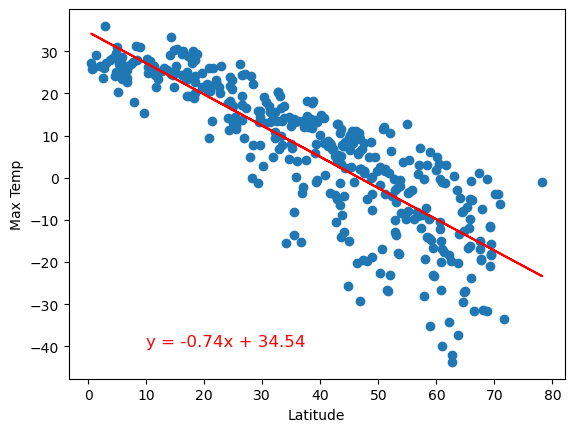

In [35]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -40))

The r-value is: 0.44866126466957745


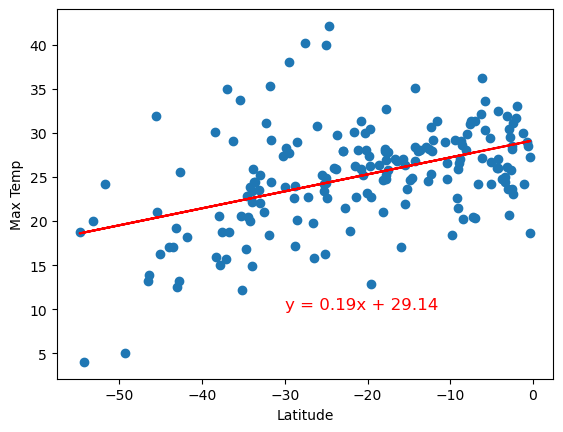

In [37]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 10))

**Discussion about the linear relationship:**
In the northern hemisphere, there is a strong negative correlation between latitude and max temperature with a correlation coeffiencent of -0.844.
In the southern hemisphere, there is a weak positive correlation between latitude and max temperatuere with a correlation coeffiencent of 0.448.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.482953700468963


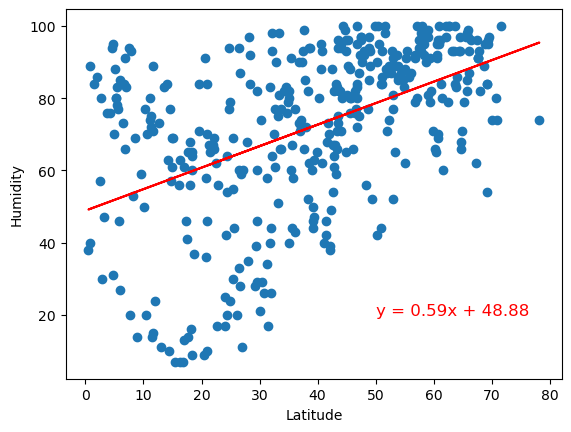

In [39]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 20))

The r-value is: 0.2624593114278003


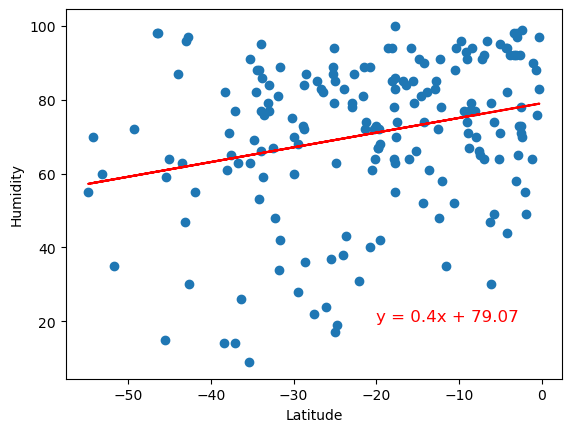

In [41]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 20))

**Discussion about the linear relationship:** 
In the northern hemisphere, there is a weak positive correlation between latitude and humidity with a correlation coefficient of 0.482.
In the southern hemisphere, there is a weak positive correlation between latitude and humidity with a correlation coefficient of 0.262.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2605431996391451


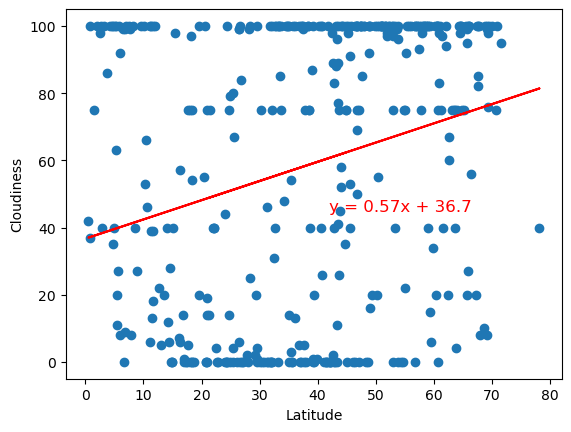

In [46]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 45))

The r-value is: 0.2420242451507127


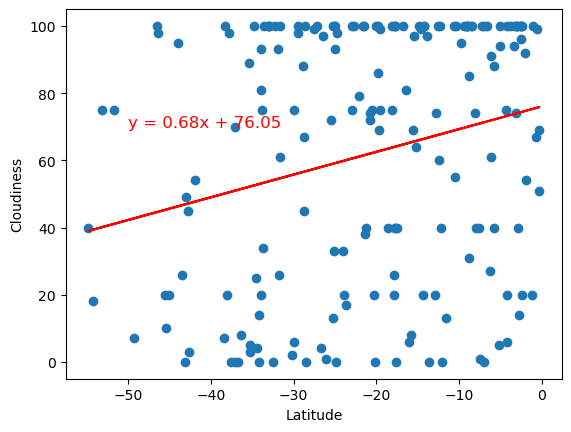

In [45]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 70))

**Discussion about the linear relationship:** 
In the northern hemisphere, there is a very weak positive correlation between latitude and cloudiness with a correlation coefficient of 0.260.
In the southern hemisphere, there is a very weak positive correlation between latitude and cloudiness with a correlation coefficient of 0.242.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.10948759485768009


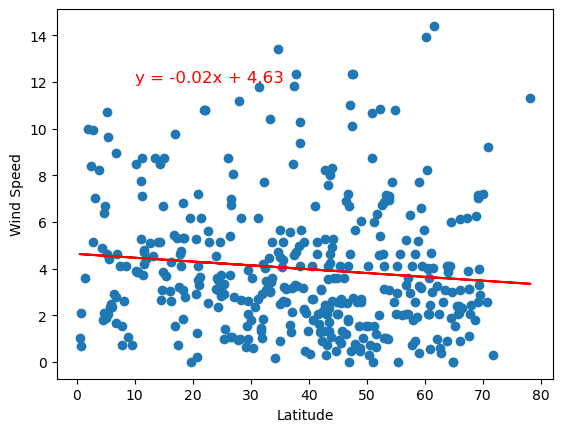

In [47]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.10027261071173632


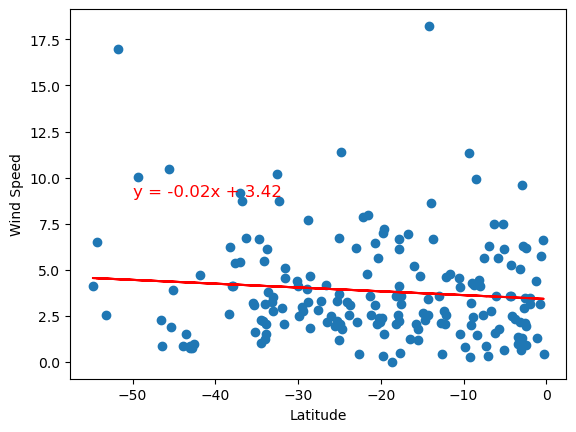

In [48]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** 
In the northern hemisphere, there is no correlation between latitude and wind speed with a correlation coefficent of -0.109.
In the southern hemisphere, there is no correlation between latitude and wind speed with a correlation coefficent of -0.100.